In [2]:
import gensim
import multiprocessing
import logging
import pandas as pd
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1

In [3]:
data = pd.read_csv('../data/final/plenos-xiv-tokens.csv')
data = data.loc[(data['political_group'].notnull())].reset_index(drop=True)

In [4]:
data.head()

,Unnamed: 0,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,text,political_group,cleaned_text
0,0,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Borràs Castanyer, Laura (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Presidenta, señorías, empieza el año y volvemo...",GPlu,"['empieza', 'año', 'volvemos', 'debate', 'inve..."
1,1,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Baldoví Roda, Joan (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Moltes gràcies, senyora presidenta. Hay alguno...",GPlu,"['moltes', 'gràcies', 'senyora', 'encanta', 'o..."
2,2,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Quevedo Iturbe, Pedro (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Señora presidenta, señorías, señor candidato a...",GPlu,"['candidato', 'presidencia', 'buenas', 'tardes..."
3,3,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Oramas González-Moro, Ana María (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Gracias, señora presidenta. Señorías, como dij...",GPlu,"['dijo', 'neruda', 'podría', 'escribir', 'vers..."
4,4,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Sabanés Nadal, Inés (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Gracias, presidenta. Señorías, a pesar de la e...",GPlu,"['pesar', 'exageración', 'pesar', 'sobreactuac..."


In [5]:
groups = ['GS', 'GP', 'GVOX', 'GCUP-EC-GC', 'GPlu', 'GR', 'GCs',
          'GV (EAJ-PNV)', 'GEH Bildu', 'GMx']

data = data[data['political_group'].isin(groups)].reset_index(drop=True)


In [6]:
#df = pd.DataFrame(data.groupby(['orador'], as_index=False)['cleaned_text'].aggregate(sum)).dropna()
# Not grouping by speaker and just keeping several items with the same label.
df = data[['orador', 'cleaned_text']]
df.columns = ['orador', 'text']
df = df.loc[df['text'] != 0].reset_index(drop=True)

In [7]:
df.head()

,orador,text
0,"Borràs Castanyer, Laura (GPlu)","['empieza', 'año', 'volvemos', 'debate', 'inve..."
1,"Baldoví Roda, Joan (GPlu)","['moltes', 'gràcies', 'senyora', 'encanta', 'o..."
2,"Quevedo Iturbe, Pedro (GPlu)","['candidato', 'presidencia', 'buenas', 'tardes..."
3,"Oramas González-Moro, Ana María (GPlu)","['dijo', 'neruda', 'podría', 'escribir', 'vers..."
4,"Sabanés Nadal, Inés (GPlu)","['pesar', 'exageración', 'pesar', 'sobreactuac..."


In [8]:
corpus = df.values.tolist()

In [11]:
corpus[0]

['Borràs Castanyer, Laura (GPlu)',
 "['empieza', 'año', 'volvemos', 'debate', 'investidura', 'pedro', 'sánchez', 'acudido', 'tono', 'talante', 'agradezco', 'escuchado', 'mucha', 'atención', 'especialmente', 'hablando', 'ejes', 'cardinales', 'hablado', 'libertad', 'incluso', 'hablado', 'libertad', 'plena', 'acordado', 'compañeros', 'presos', 'políticos', 'hecho', 'pablo', 'iglesias', 'quiero', 'dar', 'nombre', 'aludido', 'libertad', 'sometido', 'apuntado', 'capricho', 'nadie', 'pues', 'independentistas', 'sometidos', 'capricho', 'justicia', 'española', 'quisiera', 'formularle', 'preguntas', 'consciente', 'sánchez', 'país', 'aspira', 'presidir', 'democracia', 'atropellada', 'día', 'tras', 'día', 'aparatos', 'solución', 'pasa', 'alardear', 'conseguiría', 'traer', 'vuelta', 'president', 'puigdemont', 'aceptar', 'error', 'colosal', 'supuso', 'cesarlo', 'miopía', 'política', 'apabullante', 'abogacía', 'abogacía', 'sánchez', 'mientras', 'habla', 'desjudicializar', 'conflicto', 'llama', 'llare

In [12]:
import gensim

def read_corpus(fname):
    for line in fname:
        yield gensim.models.doc2vec.TaggedDocument(line[1], [line[0]])

train_corpus = list(read_corpus(corpus))

In [83]:
model0 = gensim.models.doc2vec.Doc2Vec(dm=1, vector_size=500, window=100, min_count=50, workers=cores, epochs=10)

2023-03-01 17:19:28,651 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d500,n5,w100,mc50,s0.001,t8)', 'datetime': '2023-03-01T17:19:28.651663', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [84]:
model0.build_vocab(train_corpus)

2023-03-01 17:19:29,969 : INFO : collecting all words and their counts
2023-03-01 17:19:29,973 : WARNING : Each 'words' should be a list of words (usually unicode strings). First 'words' here is instead plain <class 'str'>.
2023-03-01 17:19:29,975 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2023-03-01 17:19:33,741 : INFO : collected 88 word types and 366 unique tags from a corpus of 9382 examples and 42677461 words
2023-03-01 17:19:33,742 : INFO : Creating a fresh vocabulary
2023-03-01 17:19:33,744 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=50 retains 53 unique words (60.22727272727273%% of original 88, drops 35)', 'datetime': '2023-03-01T17:19:33.744542', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2023-03-01 17:19:33,748 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=50 leaves 42677147 word corpus (9

In [85]:
model0.train(train_corpus, total_examples=len(train_corpus), epochs=model0.epochs)

2023-03-01 17:19:33,794 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 8 workers on 53 vocabulary and 500 features, using sg=0 hs=0 sample=0.001 negative=5 window=100 shrink_windows=True', 'datetime': '2023-03-01T17:19:33.794835', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2023-03-01 17:19:34,858 : INFO : EPOCH 1 - PROGRESS: at 0.60% examples, 83357 words/s, in_qsize 16, out_qsize 0
2023-03-01 17:19:35,873 : INFO : EPOCH 1 - PROGRESS: at 2.14% examples, 88513 words/s, in_qsize 15, out_qsize 0
2023-03-01 17:19:36,925 : INFO : EPOCH 1 - PROGRESS: at 3.68% examples, 87447 words/s, in_qsize 16, out_qsize 0
2023-03-01 17:19:38,007 : INFO : EPOCH 1 - PROGRESS: at 4.42% examples, 82001 words/s, in_qsize 15, out_qsize 0
2023-03-01 17:19:39,119 : INFO : EPOCH 1 - PROGRESS: at 4.98% examples, 80821 words/s, in_qsize 16, out_qsize 0
2023-03-01 17:19:40,129 : INFO : EPOCH 1 

In [135]:
#model0.save('models/plenos-xiv-no-PV-DM.model')

In [56]:
from sklearn.manifold import TSNE
import numpy as np
from sklearn.decomposition import PCA

# Functions.
# PCA.
def reduce_dimension(model):
    speakers = model0.dv.index_to_key
    S = len(speakers)
    M = model.vector_size
    z = np.zeros((S, M))

    for i in range(S):
        z[i,:] = model.dv[i]

    dr = PCA(n_components = 2)
    Z = dr.fit_transform(z)

    Z = pd.DataFrame(Z)
    Z.columns = ['dim1', 'dim2']
    Z['speaker'] = speakers

    return Z

# T-SNE.
def rd_tsne(model):
    speakers = model0.dv.index_to_key
    S = len(speakers)
    M = model.vector_size
    z = np.zeros((S, M))

    for i in range(S):
        z[i, :] = model.dv[i]

    dr = TSNE(n_components=2)
    Z = dr.fit_transform(z)

    Z = pd.DataFrame(Z)
    Z.columns = ['dim1', 'dim2']
    Z['speaker'] = speakers

    return Z

# Get color.
def get_color(reduced):
    spk = reduced.speaker.tolist()
    col = []
    for i in range(len(spk)):
        if '(GVOX)' in spk[i]:
            # #82b431
            # rgba(130,180,49,255)
            col.append('#82b431')
        elif '(GS)' in spk[i]:
            # #c10200
            # rgba(193,2,0,255)
            col.append('#c10200')
        elif '(GCs)' in spk[i]:
            # #f87729
            # rgba(248,119,41,255)
            col.append('#f87729')
        elif '(GP)' in spk[i]:
            # #1eb3e6
            # rgba(30,179,230,255)
            col.append('#1eb3e6')
        elif '(GCUP-EC-GC)' in spk[i]:
            # #a245b2
            # rgba(162,69,178,255)
            col.append('#a245b2')
        elif '(GR)' in spk[i]:
            # #f99f00
            # rgba(249,159,0,255)
            col.append('#f99f00')
        elif '(GV (EAJ-PNV))' in spk[i]:
            # #008146
            # rgba(0,129,70,255)
            col.append('#008146')
        elif '(GEH Bildu)' in spk[i]:
            # #bbce00
            # rgba(187,206,0,255)
            col.append('#bbce00')
        else:
            col.append('#000000')

    reduced['col'] = col
    return reduced


In [90]:
reduced = get_color(rd_tsne(model0))

/Users/danielansiadibuja/opt/anaconda3/envs/aba/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/danielansiadibuja/opt/anaconda3/envs/aba/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


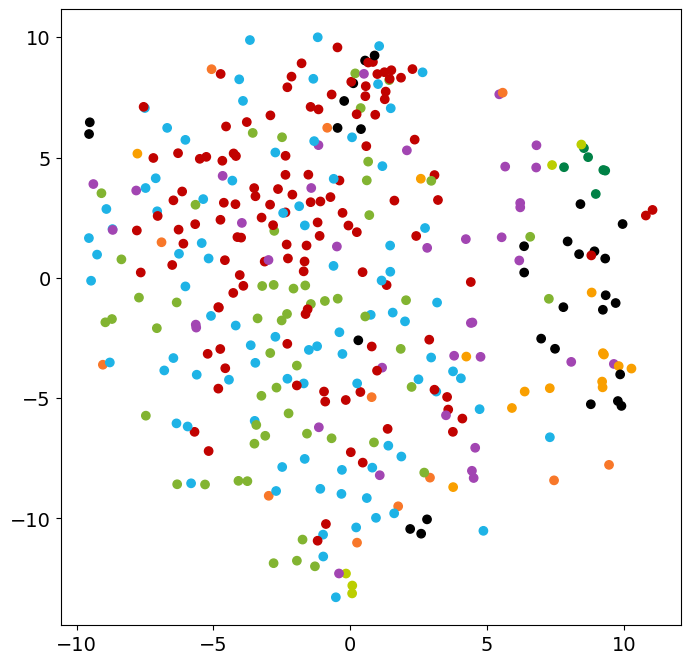

In [91]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['font.size'] = 14

plt.figure(figsize=(8, 8))
plt.scatter(reduced.dim1, reduced.dim2, c=reduced.col)
texts = []

'''
for label, x, y in zip(reduced.speaker, reduced.dim1, reduced.dim2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', alpha=0.3),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
'''
plt.show()

In [ ]:
# Infering a vector based on some words.
vector = model0.infer_vector(
    ['gracias', 'democracia', 'derechos', 'país', 'aborto', 'feminismo'])

vector